In [1]:
import matplotlib
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import scipy
import scipy.interpolate
import scipy
import statistics
from pywt import wavedec
from scipy import signal
import matplotlib.colors as mcolors
import random
import seaborn as sns
import os
from scipy import stats
import pandas
import statsmodels.api as sm
from numpy import asarray
from numpy import savetxt
import pickle
import csv


#Import imputs
from genderBandPowerr import plotbar_info_bandpower1
from genderBandPowerr import calcul
from genderBandPowerr import plotbar_info_rac

Meta-file

Provides an overview of the datasets within the MPI-Leipzig Mind-Brain-Body database.


Short description of each of the columns in this CSV file.

ID: Participant's IDs are anonimized acording to BIDS format

Gender: 1 = female; 2 = male 

Age (5-year bins): Age bins with widths of 5 years.

Handedness

Education: School Level

DRUG_0=negative_1=Positive	Drug_Substance

Smoking_num_(Non-smoker=1, Occasional Smoker=2, Smoker=3)
SKID diagnosis: Structured Clinical Interview for DSM-IV (SCID-I). 
SKID diangosis 1:
SKID diagnosis 2:
Comments_SKID_assessment	
Alcohol_Dependence_In_1st-3rd_Degree_relative	
Hamilton_Scale
BSL23_sumscore	
BSL23_behavior	
AUDIT	
Standard_Alcoholunits_Last_28days	
Alcohol_Dependence_In_1st-3rd_Degree_relative
Relationship_Status		


In [2]:
#Import the data to analise
with open('/Users/laianavarroolivella/Project_G/EEG_G2/Age_Gender/META_File_IDs_Age_Gender_Education_Drug_Smoke_SKID_LEMON.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
Age = data['Age']
Gender = data['Gender_ 1=female_2=male']
Handedness = data['Handedness']
Drugs = data['DRUG_0=negative_1=Positive']


In [3]:
#Import the data to analise
# open the file in universal line ending mode 
with open('/Users/laianavarroolivella/Project_G/EEG_G2/Files_EEG/TEIQue-SF.csv', 'rU') as infile:
  # read the file as a dictionary for each row ({header : value})
  data = {}
  reader = csv.DictReader(infile)
  for row in reader:
    for header, value in row.items():
      try:
        data[header].append(value)
      except KeyError:
        data[header] = [value]

# extract the variables you want
names = data['ID']
TeiQueSF_emotionality = data['TeiQueSF_emotionality']
TeiQueSF_well_being = data['TeiQueSF_well_being']

In [4]:
#Data EO amb 12 brain reagions y els powerband
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels_Banpower/list_final_save.txt", "rb") as fp: 
    dataEO = pickle.load(fp)

#Data EC amb 12 brain reagions y els powerband
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels_Banpower/list_finalEC_save.txt", "rb") as fp: 
    dataEC = pickle.load(fp)

#Llista dels noms dels pacients EC 
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels/sorted_list_ECsave.txt", "rb") as fp:   # Unpickling
    listEC_Names = pickle.load(fp)

#Llista dels noms dels pacients EO 
with open("/Users/laianavarroolivella/Project_G/EEG_G2/12_Chanels/sorted_list_EO_save.txt", "rb") as fp:   # Unpickling
    listEO_Names = pickle.load(fp)

In [5]:
# 1 = Female
# 2 = Male
genderCount = {}
for item in Gender:
       genderCount[item] = genderCount.get(item, 0) + 1
print(genderCount)

{'2': 145, '1': 82}


In [6]:
ageCount = {}
for item in Age:
       ageCount[item] = ageCount.get(item, 0) + 1
print(ageCount)

{'20-25': 79, '25-30': 60, '60-65': 19, '30-35': 13, '70-75': 22, '65-70': 25, '75-80': 4, '55-60': 4, '35-40': 1}


In [7]:
# Drugs si = 1.0
# Drugs ni = 0.0
drugsCount = {}
for item in Drugs:
       drugsCount[item] = drugsCount.get(item, 0) + 1
print(drugsCount)

{'0.0': 208, '1.0': 12, '': 7}


In [8]:
handednessCount = {}
for item in Handedness:
       handednessCount[item] = handednessCount.get(item, 0) + 1
print(handednessCount)

{'right': 202, 'ambidextrous': 3, 'left': 21, 'ambedextor ': 1}


In [9]:
lis_noms = ['Anterior_midline', 'Left_frontal', 'Right_frontal', 'Left_temporal', 'Left_central', 'Left_parietal', 'Left_Occipital', 'Right_Occipital', 'Right_parietal', 'Right_temporal', 'Posterior_midline', 'Right_central']

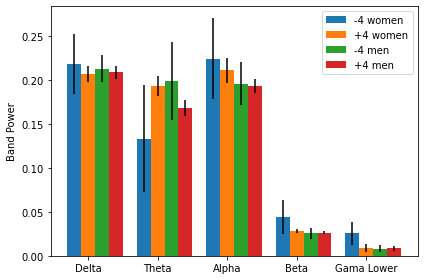

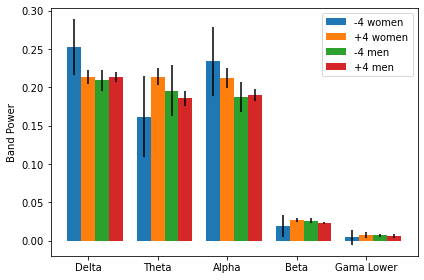

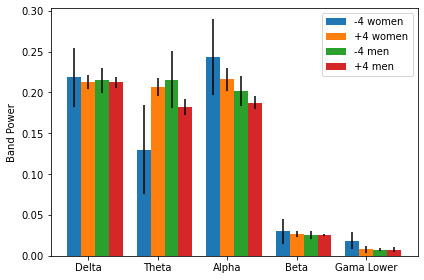

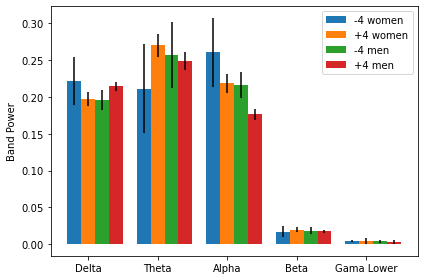

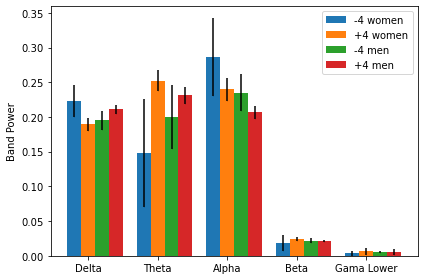

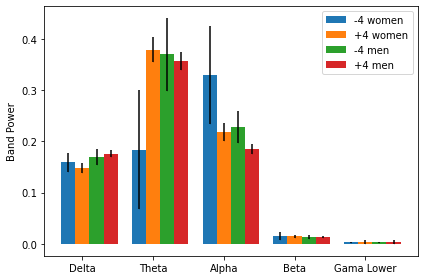

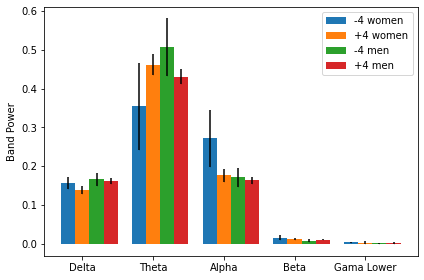

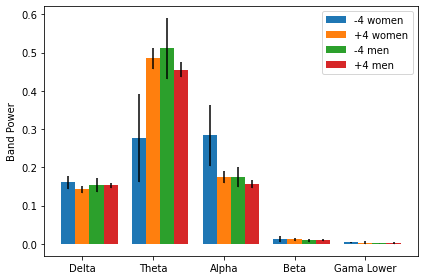

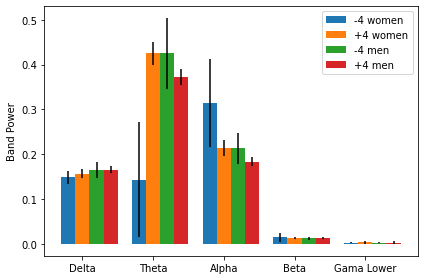

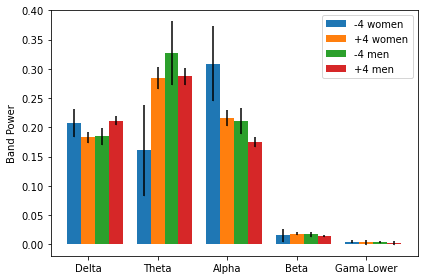

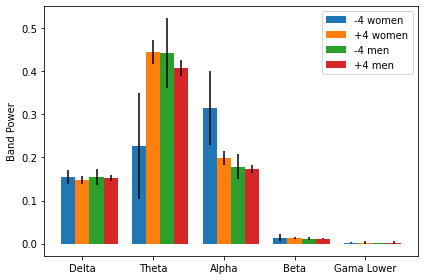

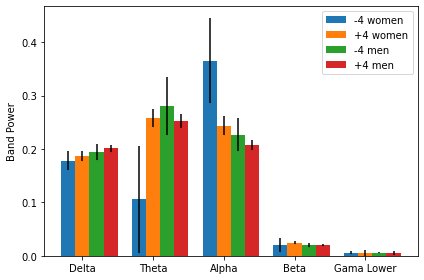

Well


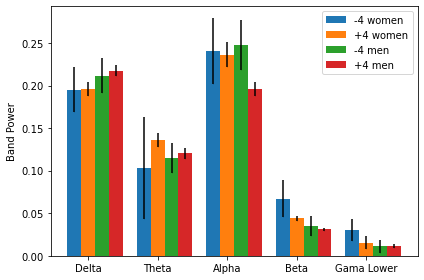

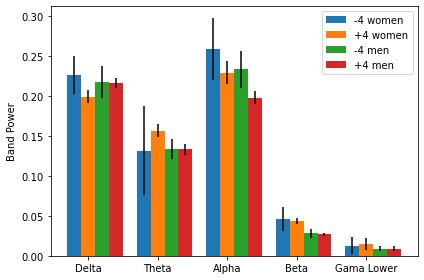

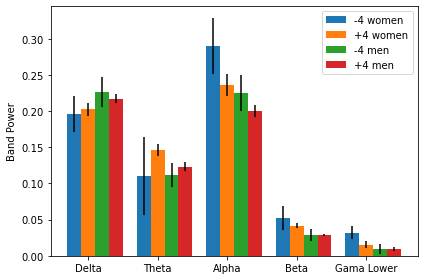

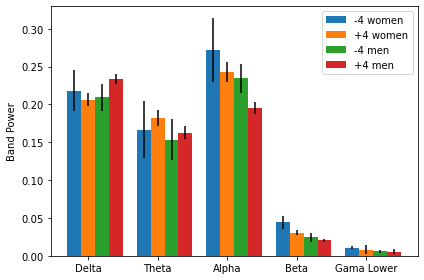

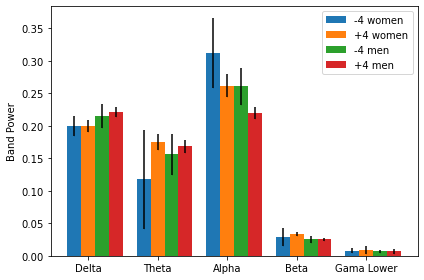

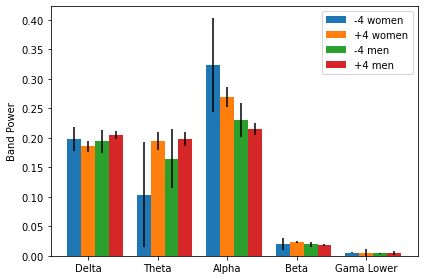

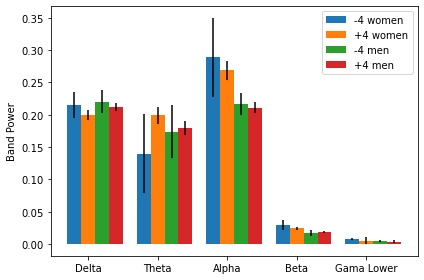

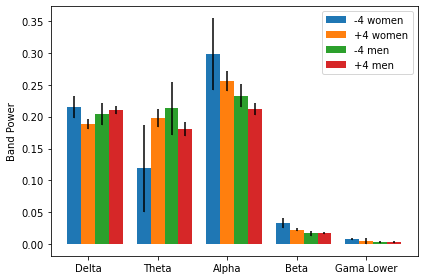

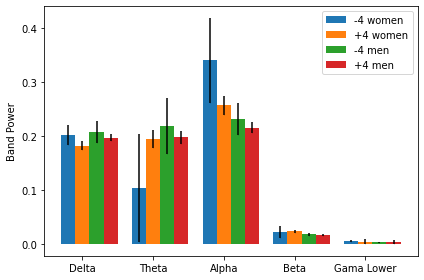

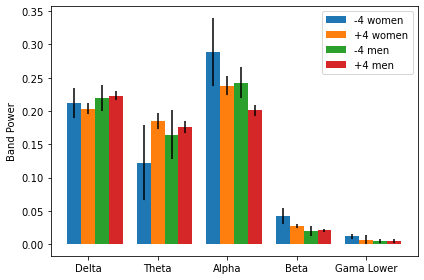

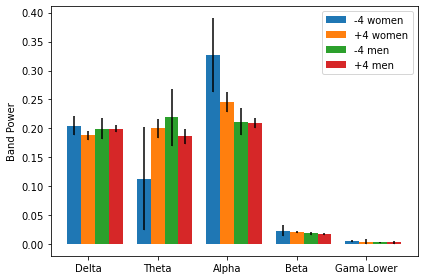

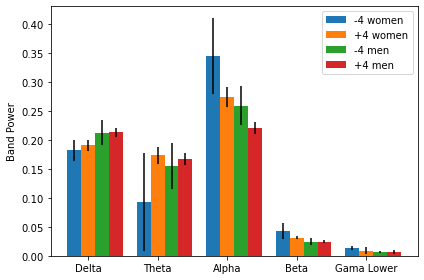

In [10]:
band_emotio_EC_m = []
band_emotio_EO_m = []
band_emotio_EO_f = []
band_emotio_EC_f = []

for r in range(0,12):
    band_m4_f, band_m4_m = plotbar_info_bandpower1(names, listEC_Names, TeiQueSF_emotionality, Gender, dataEC[r])
    band_emotio_EC_f.append(band_m4_f)
    band_emotio_EC_m.append(band_m4_m)

print('Well')

for r in range(0,12):
    band_m4_f, band_m4_m = plotbar_info_bandpower1(names, listEO_Names, TeiQueSF_emotionality, Gender, dataEO[r])
    band_emotio_EO_f.append(band_m4_f)
    band_emotio_EO_m.append(band_m4_m)

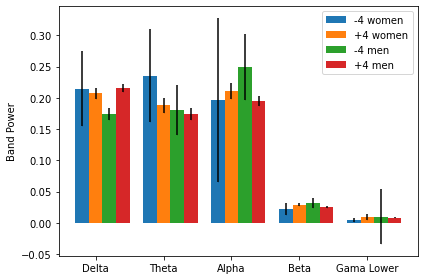

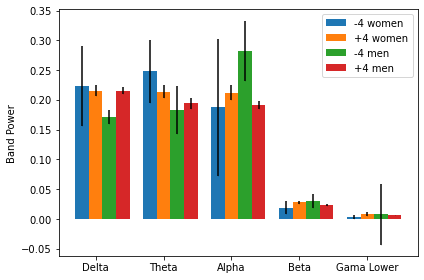

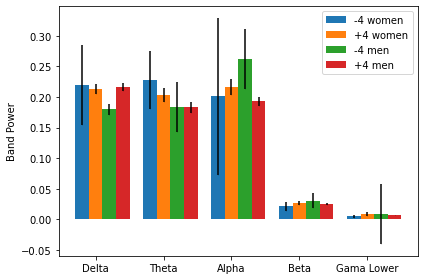

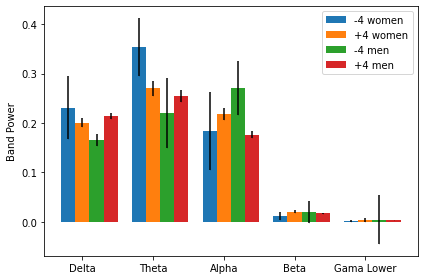

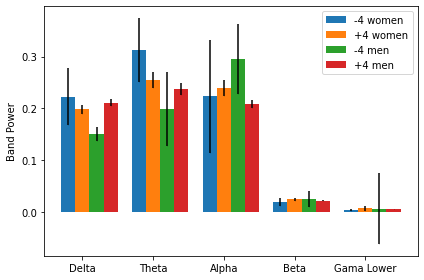

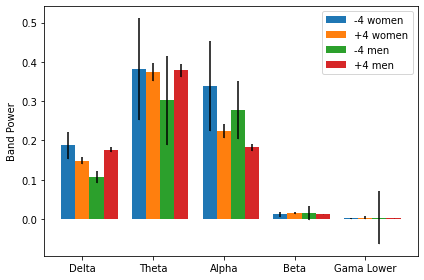

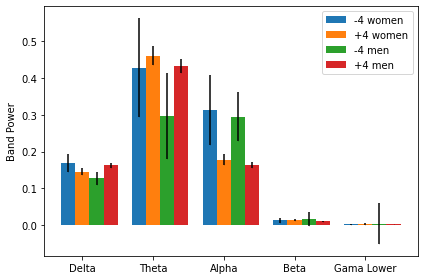

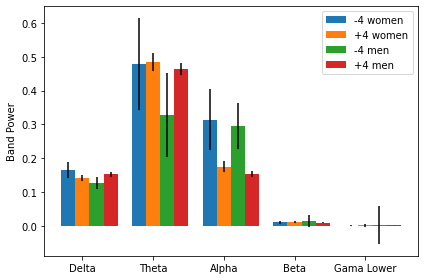

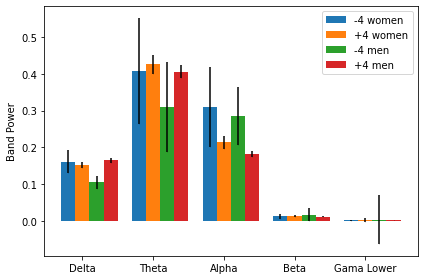

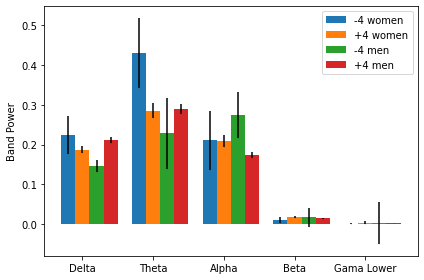

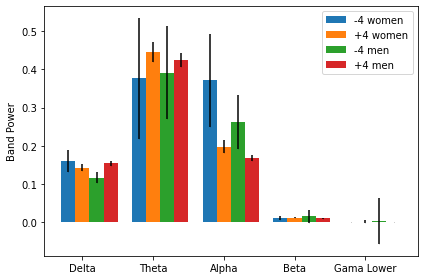

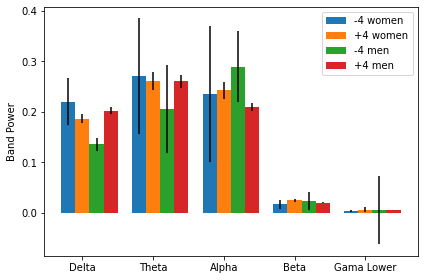

Well


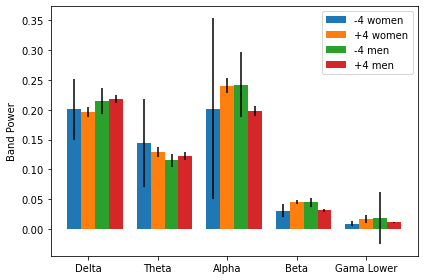

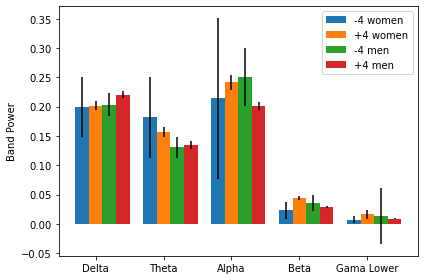

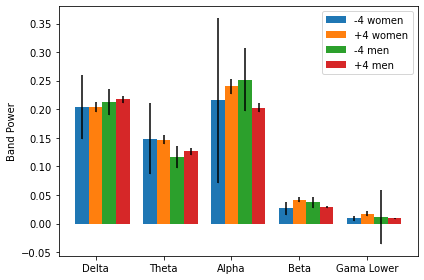

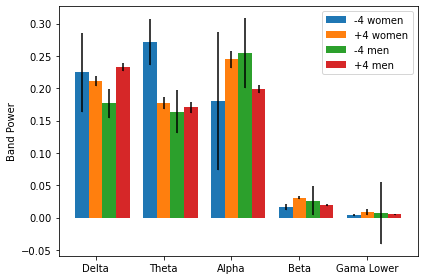

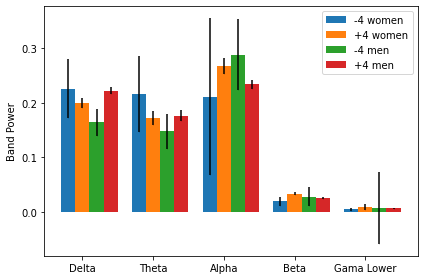

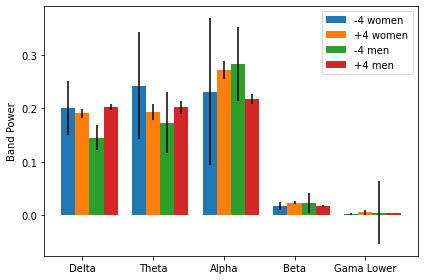

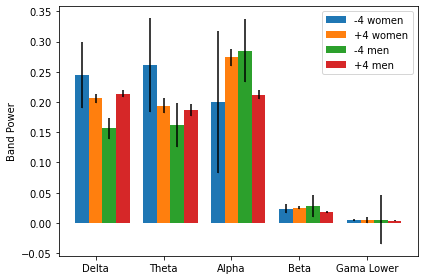

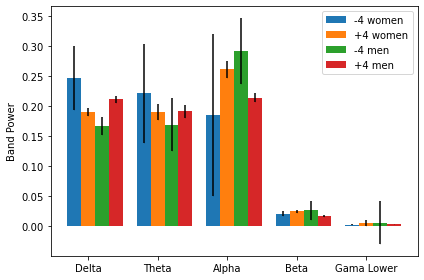

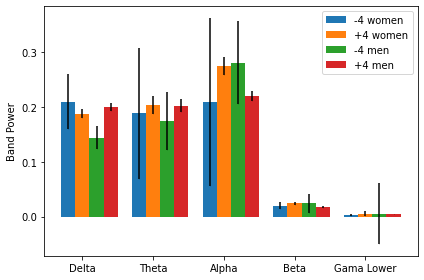

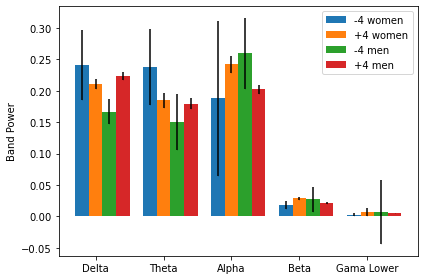

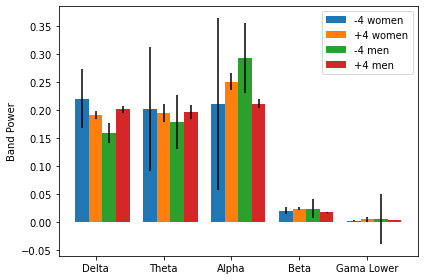

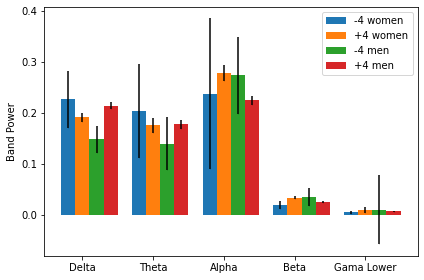

In [11]:
band_well_EC_m = []
band_well_EO_m = []
band_well_EO_f = []
band_well_EC_f = []

for r in range(0,12):
    band_m4_f, band_m4_m = plotbar_info_bandpower1(names, listEC_Names, TeiQueSF_well_being, Gender, dataEC[r])
    band_well_EC_f.append(band_m4_f)
    band_well_EC_m.append(band_m4_m)

print('Well')

for r in range(0,12):
    band_m4_f, band_m4_m = plotbar_info_bandpower1(names, listEO_Names, TeiQueSF_well_being, Gender, dataEO[r])
    band_well_EO_f.append(band_m4_f)
    band_well_EO_m.append(band_m4_m)

In [12]:
rac_emotio_m_EO = []
rac_emotio_f_EO = []
rac_emotio_m_EC = []
rac_emotio_f_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_f, rac_info_m = plotbar_info_rac(names, listEO_Names, TeiQueSF_emotionality, Gender, dataEO[r])
    rac_emotio_m_EO.append(rac_info_m)
    rac_emotio_f_EO.append(rac_info_f)

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_f, rac_info_m = plotbar_info_rac(names, listEC_Names, TeiQueSF_emotionality, Gender, dataEC[r])
    rac_emotio_m_EC.append(rac_info_m)
    rac_emotio_f_EC.append(rac_info_f)

Anterior_midline
Men
[RanksumsResult(statistic=-1.0816840970588222, pvalue=0.27939292191841647), RanksumsResult(statistic=-0.36056136568627406, pvalue=0.7184273748351793), RanksumsResult(statistic=1.0604746049596296, pvalue=0.28892873720711143), RanksumsResult(statistic=0.2969328893886963, pvalue=0.7665177458470895), RanksumsResult(statistic=0.2333044130911185, pvalue=0.8155250320039367)]
Women
[RanksumsResult(statistic=-0.05085476277156078, pvalue=0.9594412529128848), RanksumsResult(statistic=-0.2797011952435843, pvalue=0.7797067612446379), RanksumsResult(statistic=0.30512857662936466, pvalue=0.7602682273469673), RanksumsResult(statistic=0.7882488229591921, pvalue=0.4305511761767359), RanksumsResult(statistic=0.7119666788018509, pvalue=0.4764854100641487)]
Left_frontal
Men
[RanksumsResult(statistic=-0.8165654458189148, pvalue=0.4141768086527293), RanksumsResult(statistic=-0.20149017494232963, pvalue=0.8403153111594454), RanksumsResult(statistic=0.6044705248269888, pvalue=0.54553085992

In [13]:
rac_well_m_EO = []
rac_well_f_EO = []
rac_well_m_EC = []
rac_well_f_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_f, rac_info_m = plotbar_info_rac(names, listEO_Names, TeiQueSF_well_being, Gender, dataEO[r])
    rac_well_m_EO.append(rac_info_m)
    rac_well_f_EO.append(rac_info_f)

for r in range(0,12):
    print(str(lis_noms[r]))
    rac_info_f, rac_info_m = plotbar_info_rac(names, listEC_Names, TeiQueSF_well_being, Gender, dataEC[r])
    rac_well_m_EC.append(rac_info_m)
    rac_well_f_EC.append(rac_info_f)

Anterior_midline
Men
[RanksumsResult(statistic=-0.7797662674323452, pvalue=0.43552846505250675), RanksumsResult(statistic=-0.6665743899018435, pvalue=0.505044032164157), RanksumsResult(statistic=0.8174968932758457, pvalue=0.4136445239770754), RanksumsResult(statistic=1.421186906771855, pvalue=0.15526243005688373), RanksumsResult(statistic=1.421186906771855, pvalue=0.15526243005688373)]
Women
[RanksumsResult(statistic=-0.3751832396884334, pvalue=0.7075241941142583), RanksumsResult(statistic=1.1255497190653003, pvalue=0.2603561610377779), RanksumsResult(statistic=-0.1875916198442167, pvalue=0.8511967960151972), RanksumsResult(statistic=-0.9692233691951198, pvalue=0.33243375368275285), RanksumsResult(statistic=-1.2193455289874087, pvalue=0.2227130749582249)]
Left_frontal
Men
[RanksumsResult(statistic=-1.2199569022731853, pvalue=0.22248121308367907), RanksumsResult(statistic=-0.5408056370901749, pvalue=0.588641556985751), RanksumsResult(statistic=0.9055350202440138, pvalue=0.36518201573703

In [14]:
corrEmotio_m_EO = []
corrEmotio_f_EO = []
corrEmotio_m_EC = []
corrEmotio_f_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    corF, corM = calcul(names, listEO_Names, TeiQueSF_emotionality, Gender, dataEO[r], 2, 7)
    corrEmotio_m_EO.append(corM)
    corrEmotio_f_EO.append(corF)

for r in range(0,12):
    print(str(lis_noms[r]))
    corF, corM = calcul(names, listEC_Names, TeiQueSF_emotionality, Gender, dataEC[r], 2, 7)
    corrEmotio_m_EC.append(corM)
    corrEmotio_f_EC.append(corF)

Anterior_midline
(0.2754447759990337, 0.024069564793213507)
(0.04153125874784903, 0.6552107187011138)
(-0.0009237662263050991, 0.9940805053689914)
(0.09109921560704301, 0.3265442853121747)
(-0.2642333616158906, 0.03071833603842136)
(-0.03721741495792957, 0.6890684353879855)
(-0.3149205653897859, 0.009441691914409585)
(0.043612077092552326, 0.6391207512792875)
(-0.15264665322682827, 0.21750301600868988)
(0.11422292305823481, 0.21809647087202175)
Left_frontal
(0.22181863824487602, 0.07122477371312691)
(0.06695098618052323, 0.47131526254509487)
(-0.06070485452748654, 0.6255568311436465)
(0.08453770490266621, 0.3627331056398257)
(-0.2434720607461428, 0.047101496124863)
(-0.03384081517239043, 0.716010092838827)
(-0.13422709600998506, 0.2788397742813858)
(-0.0021751587133669523, 0.9813497353033449)
(-0.09311131632616408, 0.4535942120560004)
(0.09679559881088284, 0.297074729245407)
Right_frontal
(0.21782535234049757, 0.076601736371797)
(0.045380682643468166, 0.6255751661604368)
(-0.0218923611

In [15]:
corrWell_m_EO = []
corrWell_f_EO = []
corrWell_m_EC = []
corrWell_f_EC = []

for r in range(0,12):
    print(str(lis_noms[r]))
    corF, corM = calcul(names, listEO_Names, TeiQueSF_well_being, Gender, dataEO[r], 2, 7)
    corrWell_m_EO.append(corM)
    corrWell_f_EO.append(corF)

for r in range(0,12):
    print(str(lis_noms[r]))
    corF, corM = calcul(names, listEC_Names, TeiQueSF_well_being, Gender, dataEC[r], 2, 7)
    corrWell_m_EC.append(corM)
    corrWell_f_EC.append(corF)

Anterior_midline
(0.255453799015548, 0.03694399750743002)
(0.12698897648232393, 0.17058596300393086)
(0.0379980446027063, 0.7601495145674856)
(0.17140275482643758, 0.06347505577480758)
(-0.31211237579333734, 0.010133167736063483)
(-0.08426932519795843, 0.36426419180323105)
(-0.11784030185572944, 0.3422511088313639)
(-0.09461417633015265, 0.30814577950340255)
(-0.013819650582675817, 0.9116201511763848)
(-0.19951888903709805, 0.030304594338024682)
Left_frontal
(0.22584171998306302, 0.06611757730481276)
(0.15800818767293448, 0.0874714495584312)
(-0.045894529975405704, 0.712285931927704)
(0.16106415787573305, 0.08144294007747588)
(-0.30716341456413115, 0.01145933081779485)
(-0.10518558593243993, 0.2569655215447298)
(0.006787791713256379, 0.9565244699953466)
(-0.14099065812458325, 0.1277925800246578)
(0.029652347858322055, 0.8117262608724697)
(-0.20030494012759034, 0.029645333393719303)
Right_frontal
(0.20729231323941688, 0.09234299120189858)
(0.13170364045437527, 0.15513116779321728)
(0.02

In [16]:
lis_noms = ['Anterior_midline', 'Left_frontal', 'Right_frontal', 'Left_temporal', 'Left_central', 'Left_parietal', 'Left_Occipital', 'Right_Occipital', 'Right_parietal', 'Right_temporal', 'Posterior_midline', 'Right_central']
labels = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gama Lower']

In [17]:
#EO - emotionality - Women
EOemotionality_W = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EO_f[i][e])
        lis_labels.append(corrEmotio_f_EO[i][e][0])
        lis_labels.append(corrEmotio_f_EO[i][e][1])
        lis_labels.append(rac_emotio_f_EO[i][e][1])

        lol.append(lis_labels)
        EOemotionality_W.append(lis_labels)




In [18]:
#EO - emotionality - Men
EOemotionality_M = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EO_m[i][e])
        lis_labels.append(corrEmotio_m_EO[i][e][0])
        lis_labels.append(corrEmotio_m_EO[i][e][1])
        lis_labels.append(rac_emotio_m_EO[i][e][1])

        lol.append(lis_labels)
        EOemotionality_M.append(lis_labels)

In [19]:
#EC - emotionality - Women
ECemotionality_W = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EC_f[i][e])
        lis_labels.append(corrEmotio_f_EC[i][e][0])
        lis_labels.append(corrEmotio_f_EC[i][e][1])
        lis_labels.append(rac_emotio_f_EC[i][e][1])

        lol.append(lis_labels)
        ECemotionality_W.append(lis_labels)


In [20]:
#EC - emotionality - Men
ECemotionality_M = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_emotio_EC_m[i][e])
        lis_labels.append(corrEmotio_m_EC[i][e][0])
        lis_labels.append(corrEmotio_m_EC[i][e][1])
        lis_labels.append(rac_emotio_m_EC[i][e][1])

        lol.append(lis_labels)
        ECemotionality_M.append(lis_labels)

In [21]:
#EO - wellBeing - Women
EOwell_W = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EO_f[i][e])
        lis_labels.append(corrWell_f_EO[i][e][0])
        lis_labels.append(corrWell_f_EO[i][e][1])
        lis_labels.append(rac_well_f_EO[i][e][1])

        lol.append(lis_labels)
        EOwell_W.append(lis_labels)


In [22]:
#EO - wellBeing - Male
EOwell_M = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EO_m[i][e])
        lis_labels.append(corrWell_m_EO[i][e][0])
        lis_labels.append(corrWell_m_EO[i][e][1])
        lis_labels.append(rac_well_m_EO[i][e][1])

        lol.append(lis_labels)
        EOwell_M.append(lis_labels)

In [23]:
#EC - wellBeing - Women
ECwell_W = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EC_f[i][e])
        lis_labels.append(corrWell_f_EC[i][e][0])
        lis_labels.append(corrWell_f_EC[i][e][1])
        lis_labels.append(rac_well_f_EC[i][e][1])

        lol.append(lis_labels)
        ECwell_W.append(lis_labels)

In [24]:
#EC - wellBeing - Male
ECwell_M = []
for i in range(0,len(lis_noms)):
    lis_mitx = []
    lol=[]
    for e in range(0, len(labels)):
        lis_labels = []
        lis_labels.append(lis_noms[i])
        lis_labels.append(labels[e])
        lis_labels.append(band_well_EC_m[i][e])
        lis_labels.append(corrWell_m_EC[i][e][0])
        lis_labels.append(corrWell_m_EC[i][e][1])
        lis_labels.append(rac_well_m_EC[i][e][1])

        lol.append(lis_labels)
        ECwell_M.append(lis_labels)

In [25]:
df = pandas.DataFrame(data=EOemotionality_W)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOemotionality_W.csv", sep=',',index=False)

df = pandas.DataFrame(data=EOemotionality_M)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOemotionality_M.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECemotionality_W)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECemotionality_W.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECemotionality_M)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECemotionality_M.csv", sep=',',index=False)

In [26]:
df = pandas.DataFrame(data=EOwell_W)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOwell_W.csv", sep=',',index=False)

df = pandas.DataFrame(data=EOwell_M)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/EOwell_M.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECwell_W)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECwell_W.csv", sep=',',index=False)

df = pandas.DataFrame(data=ECwell_M)
df.to_csv("/Users/laianavarroolivella/Project_G/EEG_G2/ECwell_M.csv", sep=',',index=False)

corr F vs. M